<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/Analise_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Analise Ação Ibov

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Importação de dados B3

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Ações para analises 

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Carteira Recomendada 

carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2017-06-06,16.398222,5.803128,3.382049,19.347090,6.714044
2017-06-07,16.200447,5.901155,3.365054,19.252464,6.764149
2017-06-08,15.933881,5.855409,3.407542,19.667356,6.706888
2017-06-09,15.572723,5.757380,3.356556,19.871164,6.588783
2017-06-12,15.546926,5.757380,3.348058,19.536335,6.552992
...,...,...,...,...,...
2022-05-31,14.190000,9.566470,10.960000,86.209999,25.370001
2022-06-01,14.120000,9.490000,11.260000,88.239998,26.209999
2022-06-02,14.120000,9.530000,11.850000,89.900002,26.330000


In [ ]:
#Fechamento Ibov

ibov.dropna(inplace=True)
ibov

Date
2017-06-06     62955.000000
2017-06-07     63171.000000
2017-06-08     62756.000000
2017-06-09     62211.000000
2017-06-12     61700.000000
                  ...      
2022-05-31    111351.000000
2022-06-01    111360.000000
2022-06-02    112393.000000
2022-06-03    111102.000000
2022-06-06    110553.210938
Name: Adj Close, Length: 1237, dtype: float64

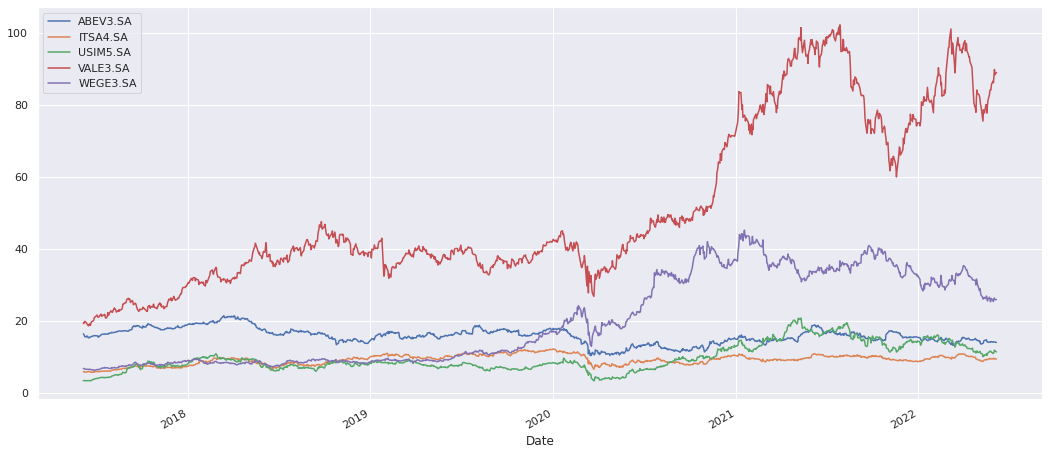

In [ ]:
sns.set()
carteira.plot(figsize=(18,8));

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

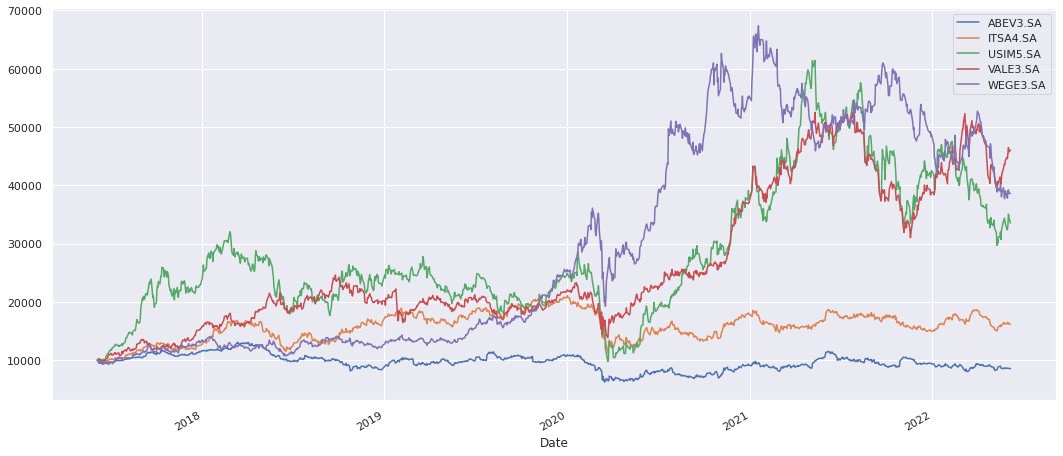

In [ ]:
carteira_normalizada.plot(figsize=(18,8));

In [ ]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2017-06-06,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2017-06-07,9879.392481,10168.920548,9949.748829,9951.090591,10074.627300,50023.779749
2017-06-08,9716.834444,10090.090904,10075.377814,10165.537415,9989.342610,50037.183188
2017-06-09,9496.592629,9921.167891,9924.622186,10270.880303,9813.435300,49426.698309
2017-06-12,9480.861112,9921.167891,9899.496248,10097.815861,9760.127752,49159.468864
...,...,...,...,...,...,...
2022-05-31,8653.376937,16485.024167,32406.391922,44559.672861,37786.470100,139890.935987
2022-06-01,8610.689568,16353.249755,33293.428759,45608.925644,39037.576427,142903.870154
2022-06-02,8610.689568,16422.178035,35037.933878,46466.937719,39216.307526,145754.046727


In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2017-06-06    50000.000000
2017-06-07    50171.551108
2017-06-08    49841.950600
2017-06-09    49409.101739
2017-06-12    49003.256294
                  ...     
2022-05-31    88436.978794
2022-06-01    88444.126757
2022-06-02    89264.554047
2022-06-03    88239.218489
2022-06-06    87803.360287
Name: Adj Close, Length: 1237, dtype: float64

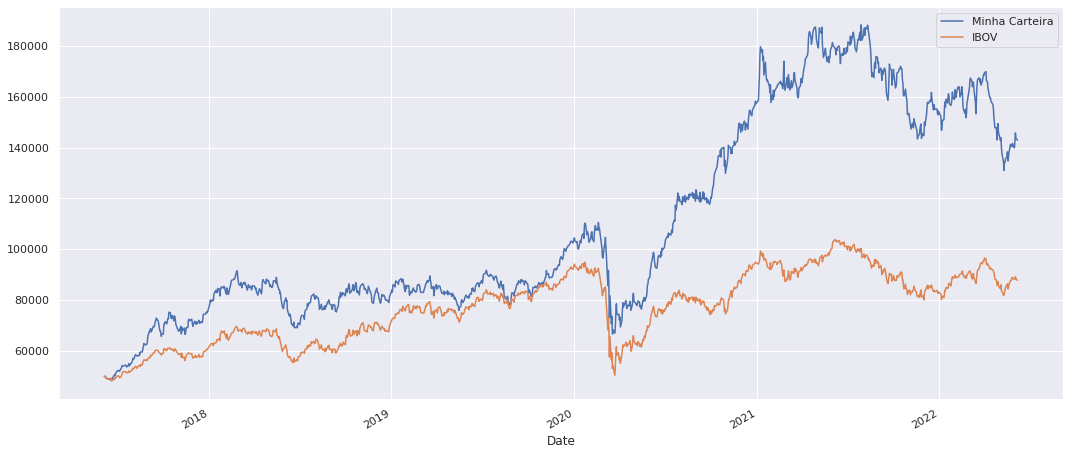

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [ ]:
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,9643.718076,15754.940806,28367.910510,26305.360446,29699.543755,109771.473594
std,1334.757966,2423.323556,11238.347601,12018.353342,18294.036526,39500.938179
min,6277.017644,9763.516820,9752.708095,9616.251753,9285.716924,48515.458808
25%,8867.431410,13981.310334,21019.652612,18357.952676,12979.677381,81037.249226
50%,9715.221164,16086.128223,24766.747588,20908.594485,21132.424787,87874.701426
75%,10458.282053,17522.828395,35954.739474,37927.619674,49043.921431,150137.347507
max,13074.334993,21056.284034,61409.140605,52890.525282,67346.895003,188231.109116
